In [18]:
import numpy as np
import matplotlib.pyplot as plt

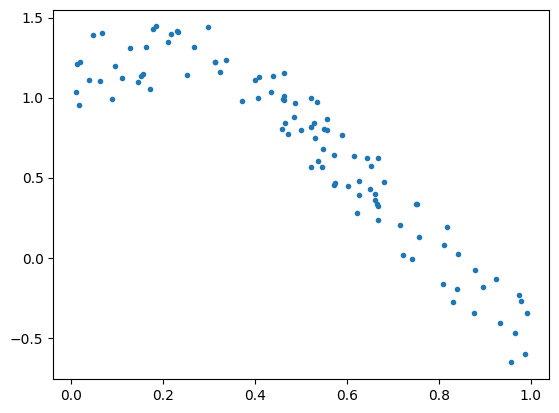

In [19]:
# numpy version
N = 100
x = np.random.rand(N,1)
y = np.sin(3*x + 1) + .5 * np.random.rand(N,1)
plt.plot(x[:,0],y[:,0],'.')
plt.show()

In [20]:
import tensorflow as tf

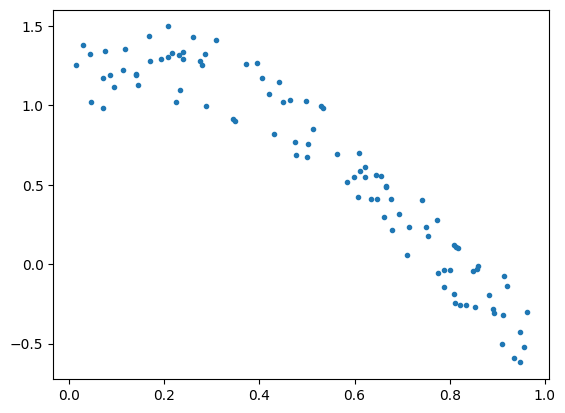

In [21]:
# tensorflow version
N = 100
x = tf.random.uniform((N,1))
y = tf.sin(3*x + 1) + .5 * tf.random.uniform((N,1))
plt.plot(x[:,0],y[:,0],'.')
plt.show()

# TF Gradient Tape

In [24]:
# MLP [1,32,16,1]

w1=tf.Variable(tf.random.normal((1,32)))
b1=tf.Variable(tf.random.normal((32,)))
w2=tf.Variable(tf.random.normal((32,16)))
b2=tf.Variable(tf.random.normal((16,)))
w3=tf.Variable(tf.random.normal((16,1)))
b3=tf.Variable(tf.random.normal((1,)))

def model(x):
  x = tf.sigmoid(x @ w1 +b1)
  x = tf.sigmoid(x @ w2 +b2)

  return x @ w3 +b3

def mse_loss(p,t):
  e = (p - t)

  return tf.reduce_mean(e * e) #reduce meaning the output is scalar

lr = 0.1
for epoch in range(1,3001):
  with tf.GradientTape() as t:
    p = model(x)
    loss = mse_loss(p,y)

    if epoch % 1000 == 0:
      print(epoch, loss.numpy())

  dw1, db1, dw2, db2, dw3, db3 = t.gradient(loss,[w1, b1, w2, b2, w3, b3]) # the derivative

  w1.assign_sub(dw1 * lr)
  b1.assign_sub(db1 * lr)
  w2.assign_sub(dw2 * lr)
  b2.assign_sub(db2 * lr)
  w3.assign_sub(dw3 * lr)
  b3.assign_sub(db3 * lr)

1000 0.027818235
2000 0.023149166
3000 0.021931307


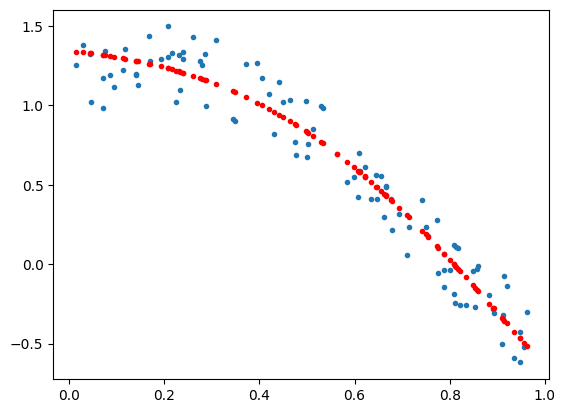

In [26]:
z = model(x).numpy()
plt.plot(x[:,0],y[:,0],'.')
plt.plot(x[:,0],z[:,0],'.r')
plt.show()

# TF Keras

## Sequencial

In [27]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input

In [28]:
# MLP [1,32,16,1]
model = keras.Sequential([
    Input((1,)),
    Dense(32,activation='sigmoid'),
    Dense(16,activation='sigmoid'),
    Dense(1),
])
model.compile(loss='mse',optimizer=keras.optimizers.SGD(0.1)) # compile model

In [ ]:
model.fit(x,y,epochs=3000)

4/4 [==============================] - 0s 5ms/step


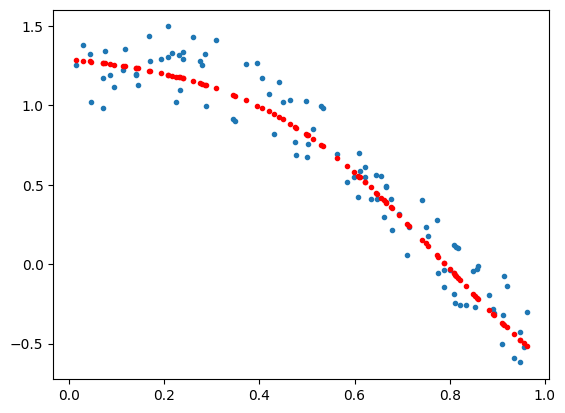

In [31]:
z = model.predict(x)
plt.plot(x[:,0],y[:,0],'.')
plt.plot(x[:,0],z[:,0],'.r')
plt.show()

## Model

In [33]:
# MLP [1,32,16,1]
inputs = Input((1,))
fc1 = Dense(32,activation='sigmoid')
fc2 = Dense(16,activation='sigmoid')
fc3 = Dense(1)

outputs = fc3(fc2(fc1(inputs)))
model = keras.Model(inputs,outputs)

model.compile(loss='mse',optimizer=keras.optimizers.SGD(0.1))

In [34]:
model.fit(x,y,epochs=3000,verbose=0)

4/4 [==============================] - 0s 5ms/step


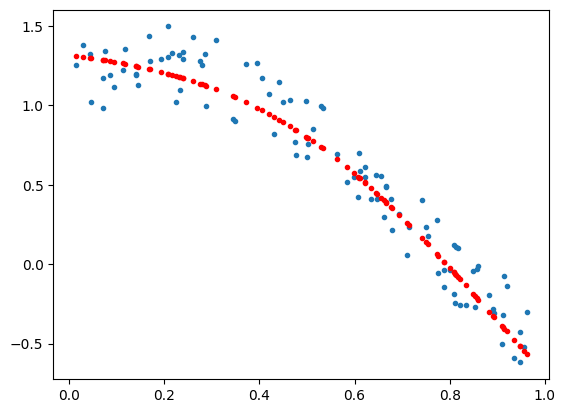

In [35]:
z = model.predict(x)
plt.plot(x[:,0],y[:,0],'.')
plt.plot(x[:,0],z[:,0],'.r')
plt.show()

# PT

In [37]:
import torch

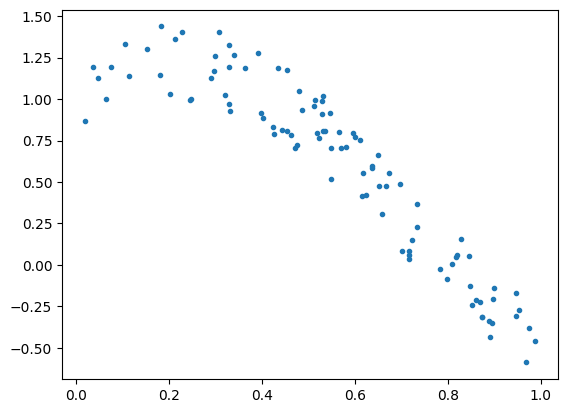

In [38]:
# pytorch version
N = 100
x = torch.rand(N,1)
y = torch.sin(3*x + 1) + .5 * torch.rand(N,1)
plt.plot(x[:,0],y[:,0],'.')
plt.show()

In [43]:
# MLP [1,32,16,1]

w1=torch.randn(1,32,requires_grad=True) # randn is random with normal distirbution
b1=torch.randn(32,requires_grad=True)
w2=torch.randn(32,16,requires_grad=True)
b2=torch.randn(16,requires_grad=True)
w3=torch.randn(16,1,requires_grad=True)
b3=torch.randn(1,requires_grad=True)

def model(x):
  x = torch.sigmoid(x @ w1 +b1)
  x = torch.sigmoid(x @ w2 +b2)

  return x @ w3 +b3

def mse_loss(p,t):
  e = (p - t)

  return torch.mean(e * e)

lr = 0.1
for epoch in range(1,3001):
  p = model(x)
  loss = mse_loss(p,y)

  if epoch % 1000 == 0:
    print(epoch, loss.item())

  loss.backward() # the derivative

  with torch.no_grad():
    w1 -= w1.grad * lr
    b1 -= b1.grad * lr
    w2 -= w2.grad * lr
    b2 -= b2.grad * lr
    w3 -= w3.grad * lr
    b3 -= b3.grad * lr
    w1.grad.zero_()
    b1.grad.zero_()
    w2.grad.zero_()
    b2.grad.zero_()
    w3.grad.zero_()
    b3.grad.zero_()

1000 0.03851277753710747
2000 0.025809504091739655
3000 0.02405979111790657


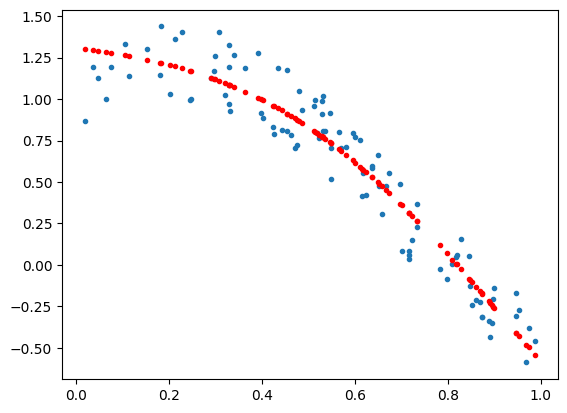

In [44]:
with torch.no_grad():
  z = model(x).numpy()

plt.plot(x[:,0],y[:,0],'.')
plt.plot(x[:,0],z[:,0],'.r')
plt.show()

## Sequential

In [45]:
from torch import nn

In [47]:
# MLP [1,32,16,1]

model = nn.Sequential(
    nn.Linear(1,32),
    nn.Sigmoid(),
    nn.Linear(32,16),
    nn.Sigmoid(),
    nn.Linear(16,1),
)

In [48]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
loss_fn = nn.MSELoss()

epochs = 3000
model.train()

for epoch in range(1,epochs +1):
  z = model(x)
  loss = loss_fn(z,y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(epoch, loss.item())

1000 0.04918462783098221
2000 0.03943927586078644
3000 0.03247915580868721


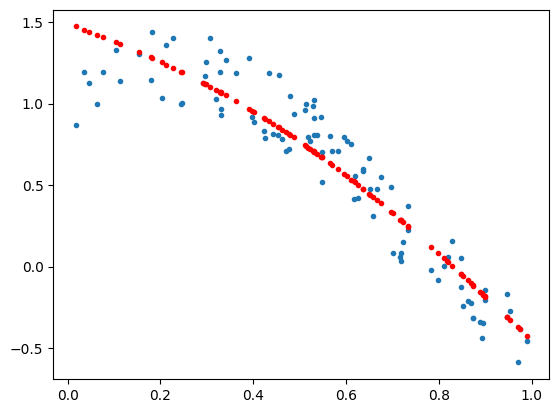

In [49]:
model.eval()
with torch.no_grad():
  z = model(x)
  z = z.numpy()

plt.plot(x[:,0],y[:,0],'.')
plt.plot(x[:,0],z[:,0],'.r')
plt.show()

## Module

In [61]:
# MLP [1,32,16,1]

class Regressor(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1,32)
    self.fc2 = nn.Linear(32,16)
    self.fc3 = nn.Linear(16,1)

  def forward(self,x):
    x = torch.sigmoid(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    return self.fc3(x)

In [62]:
model = Regressor()

In [63]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
loss_fn = nn.MSELoss()

epochs = 3000
model.train()

for epoch in range(1,epochs +1):
  z = model(x)
  loss = loss_fn(z,y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(epoch, loss.item())

1000 0.051678791642189026
2000 0.042801909148693085
3000 0.03554597496986389


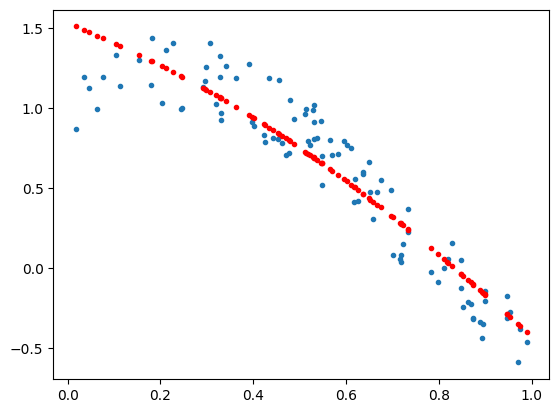

In [64]:
model.eval()
with torch.no_grad():
  z = model(x)
  z = z.numpy()

plt.plot(x[:,0],y[:,0],'.')
plt.plot(x[:,0],z[:,0],'.r')
plt.show()

## DataLoader

In [66]:
from torch.utils.data import Dataset,DataLoader,TensorDataset

In [68]:
train_dataloader = DataLoader(TensorDataset(x,y), batch_size=16)

In [71]:
for x_,y_ in train_dataloader:
  print(x_.shape,y_.shape)

torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([4, 1]) torch.Size([4, 1])


## Custom Dataset

In [73]:
class MyDataset(Dataset):
  def __init__(self,x,y):
    self.x = x
    self.y = y

  def __getitem__(self, i):
    return self.x[i],self.y[i]

  def __len__(self):
    return len(self.x)

In [74]:
train_dataset = MyDataset(x,y)
train_dataloader = DataLoader(train_dataset,batch_size=16)

## Openimages

In [75]:
!pip install openimages

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.1 MB/s eta 0:00:00


In [78]:
from openimages.download import download_images

In [79]:
!mkdir dataset
!touch dataset/exclusion.txt

mkdir: cannot create directory ‘dataset’: File exists


In [81]:
download_images('dataset',['Dog','Cat'],'dataset/exclusion.txt',limit=100)

/usr/local/lib/python3.10/dist-packages/openimages/download.py:493: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_images.drop(unnecessary_columns, axis=1, inplace=True)
/usr/local/lib/python3.10/dist-packages/openimages/download.py:504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_images.drop(["LabelName"], axis=1, inplace=True)
/usr/local/lib/python3.10/dist-packages/openimages/download.py:504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

{'dog': 'dataset/dog/images', 'cat': 'dataset/cat/images'}

In [82]:
import glob

In [83]:
len(glob.glob('/content/dataset/cat/images/*.jpg'))

100

In [84]:
len(glob.glob('/content/dataset/dog/images/*.jpg'))

100

In [93]:
from PIL import Image
import os

class DognCat(Dataset):
  def __init__(self, path, transform=None):
    self.fn = glob.glob(os.path.join(path, '**/*.jpg'), recursive=True)
    self.transform = transform
    self.labels = [f.split(os.sep)[-1] for f in glob.glob(os.path.join('dataset', '*')) if os.path.isdir(f)]

  def __getitem__(self, i):
    x = Image.open(self.fn[i]).convert('RGB')
    if self.transform is not None:
      x = self.transform(x)
    y = self.labels.index(self.fn[i].split(os.sep)[1])
    return x, y

  def __len__(self):
    return len(self.fn)

In [94]:
dataset = DognCat('dataset')

In [95]:
next(iter(dataset))

(<PIL.Image.Image image mode=RGB size=1024x768>, 0)

In [96]:
iter_dataset = iter(dataset)

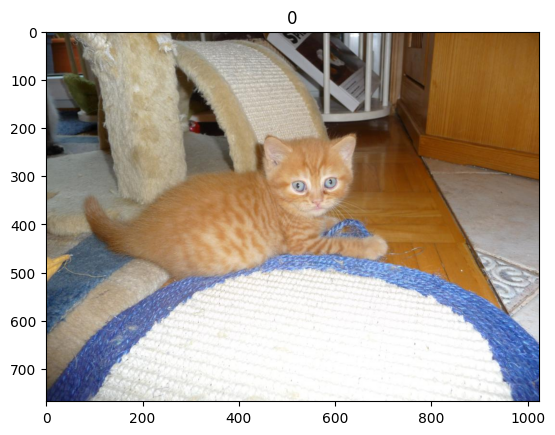

In [97]:
x,y = next(iter_dataset)
plt.imshow(x)
plt.title(y)
plt.show()

## Transform

In [98]:
from torchvision import transforms
from torchvision.transforms import v2

In [99]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [100]:
dataset = DognCat('dataset', transform)

In [101]:
iter_dataset = iter(dataset)
x, y = next(iter_dataset)
x

tensor([[[0.2824, 0.2863, 0.2941,  ..., 0.4549, 0.4588, 0.4588],
         [0.1922, 0.1882, 0.2078,  ..., 0.4627, 0.4667, 0.4667],
         [0.1529, 0.1490, 0.1647,  ..., 0.4706, 0.4667, 0.4706],
         ...,
         [0.1176, 0.1294, 0.1059,  ..., 0.2157, 0.1922, 0.2078],
         [0.1059, 0.1216, 0.1059,  ..., 0.1882, 0.1843, 0.1843],
         [0.0941, 0.0902, 0.1020,  ..., 0.2039, 0.1843, 0.1725]],

        [[0.3882, 0.3843, 0.3608,  ..., 0.2588, 0.2627, 0.2627],
         [0.2824, 0.2824, 0.2863,  ..., 0.2706, 0.2706, 0.2706],
         [0.1686, 0.1765, 0.1765,  ..., 0.2784, 0.2745, 0.2784],
         ...,
         [0.1333, 0.1451, 0.1333,  ..., 0.3059, 0.2980, 0.3176],
         [0.1176, 0.1373, 0.1333,  ..., 0.2706, 0.2784, 0.2863],
         [0.1020, 0.1059, 0.1294,  ..., 0.2863, 0.2784, 0.2706]],

        [[0.4824, 0.4667, 0.4000,  ..., 0.0549, 0.0588, 0.0627],
         [0.3451, 0.3569, 0.3529,  ..., 0.0588, 0.0588, 0.0588],
         [0.1765, 0.2039, 0.2157,  ..., 0.0588, 0.0549, 0.

In [102]:
transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])

# Vision Transformer

## einops

In [105]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.1 MB/s eta 0:00:00


In [116]:
import einops

In [106]:
cat = plt.imread('/content/dataset/cat/images/0008ab3d8674f6ca.jpg')
dog = plt.imread('/content/dataset/dog/images/00064d23bf997652.jpg')

In [110]:
print(cat.shape)
print(dog.shape)

(1024, 768, 3)
(1024, 686, 3)


In [111]:
import cv2

In [112]:
cat = cv2.resize(cat,(600,800))
dog = cv2.resize(dog,(600,800))

In [113]:
print(cat.shape)
print(dog.shape)

(800, 600, 3)
(800, 600, 3)


In [114]:
image = np.array([cat,dog])

In [117]:
image = image / 255

In [118]:
image.shape # b h w c

(2, 800, 600, 3)

In [119]:
image_reduce = einops.reduce(image,'b (h 10) (w 10) c -> b h w c','mean')

In [120]:
image_reduce.shape

(2, 80, 60, 3)

In [121]:
image_rearrange = einops.rearrange(image_reduce,'b h w c -> b c h w')

In [122]:
image_rearrange.shape

(2, 3, 80, 60)

In [124]:
ph, pw = 4,4
xx = einops.rearrange(image_reduce,'b (h ph) (w pw) c -> b (h w) ph pw c',ph=ph,pw=pw)

In [125]:
xx.shape

(2, 300, 4, 4, 3)

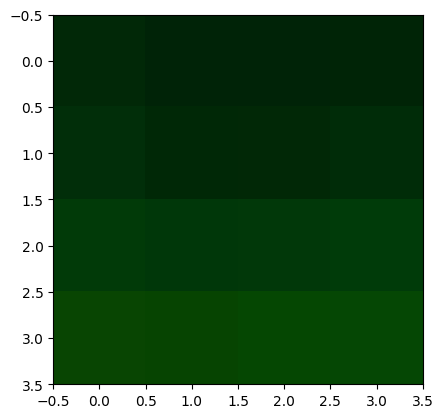

In [127]:
plt.imshow(xx[1][0])

In [227]:
import math
import torch.nn.functional as F

In [228]:
class Attention(nn.Module):
  def __init__(self,d):
    super().__init__()
    self.d = d
    self.Q = nn.Linear(d,d)
    self.K = nn.Linear(d,d)
    self.V = nn.Linear(d,d)

  def forward(self,x):
    q = self.Q(x)
    k = self.K(x)
    v = self.V(x)
    score = F.softmax(torch.matmul(q, k.transpose(1,2) / math.sqrt(self.d)), dim=-1)
    return torch.matmul(score, v)

In [229]:
x = torch.rand((10,100,128)) # b p a
attn = Attention(128)

In [230]:
a = attn(x)

In [231]:
a.shape

torch.Size([10, 100, 128])

In [232]:
class MultiHeadAttention(nn.Module):
  def __init__(self, head, d):
    super().__init__()
    self.head = head
    self.d = d
    self.attentions = nn.ModuleList([])
    for _ in range(head):
      self.attentions.append(Attention(d))
    self.Linear = nn.Linear(head * d, d)
  def forward(self, x):
    X = []
    for attention in self.attentions:
      X.append(attention(x))
    X = einops.rearrange(X, 'h b p d -> b p (h d)')
    return self.Linear(X)

In [233]:
msa = MultiHeadAttention(8, 128)
a = msa(x)
a.shape

torch.Size([10, 100, 128])

In [234]:
class PositionalEncoding(nn.Module):
  def __init__(self, d, patch):
    super().__init__()
    pe = torch.zeros(patch, d)
    pos = torch.arange(0, patch, dtype=torch.float).unsqueeze(1)
    inv = torch.exp(torch.arange(0, d, 2, dtype=torch.float) * -math.log(10000.) / d)

    pe[:, 0::2] = torch.sin(pos * inv)
    pe[:, 1::2] = torch.cos(pos * inv)
    pe = pe.unsqueeze(0)

    self.register_buffer('pe', pe)

  def forward(self, x):
    return x + self.pe[:, :x.size(1)]

In [235]:
pos_encoder = PositionalEncoding(128,100)
ap = pos_encoder(a)

In [236]:
ap.shape

torch.Size([10, 100, 128])

In [237]:
class Transformer(nn.Module):
  def __init__(self, d, hidden, head=8, n_MSA=2):
    super().__init__()
    self.norm = nn.LayerNorm(d)
    self.MSAs = nn.ModuleList([])

    for _ in range(n_MSA):
      self.MSAs.append(nn.ModuleList([
          MultiHeadAttention(head,d),
          nn.Linear(d,hidden),
          nn.Linear(hidden,d)
      ]))

  def forward(self, x):
    for msa, fc1, fc2 in self.MSAs:
      x = self.norm(msa(x) + x)
      x = self.norm(fc2(F.relu(fc1(x))) + x)
    return x

In [238]:
from einops.layers.torch import Rearrange

In [239]:
class ViT(nn.Module):
  def __init__(self, image_size=(224, 224), patch_size=(16, 16), channel=3, d=128, classes=1000):
    super().__init__()
    self.patch = nn.Sequential(
        Rearrange('b c (h ph) (w pw) -> b (h w) (ph pw c)', ph=patch_size[0], pw=patch_size[1]),
        nn.Linear(patch_size[0] * patch_size[1] * channel, d)
    )
    patch = (image_size[0] // patch_size[0]) * (image_size[1] // patch_size[1])

    self.position_encoder = PositionalEncoding(d, patch + 1)
    self.cls_token = nn.Parameter(torch.rand(1,1,d))
    self.transformer = Transformer(d, 2*d)
    self.norm = nn.LayerNorm(d)
    self.fc = nn.Linear(d, classes)

  def forward(self, x):
    x = self.patch(x)
    b, patch, d = x.shape
    cls_tokens = einops.repeat(self.cls_token,'1 p d -> b p d', b=b )
    x = torch.cat((cls_tokens ,x),dim=1)
    x = self.position_encoder(x)
    x = self.transformer(x)
    x = x[:,0]
    x = self.fc(self.norm(x))
    return F.softmax(x, dim=-1)

In [240]:
vit = ViT()

In [241]:
x = torch.rand((10,3,224,224))

In [242]:
z = vit(x)

In [243]:
z.shape

torch.Size([10, 1000])